<a href="https://colab.research.google.com/github/KrRA1122/Machine-Learning-/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Survived
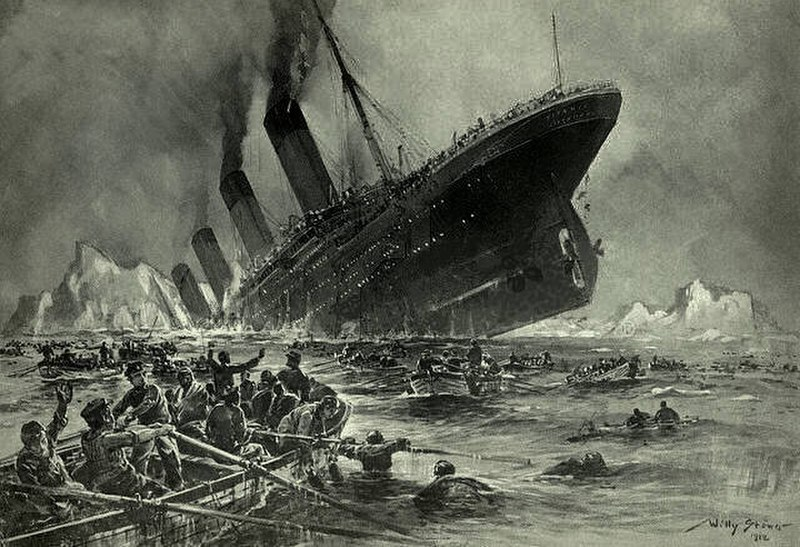

#Step 1: Read the train data

In [1]:
import pandas as pd
df = pd.read_csv('/content/train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Step 2: Perform Basic data quality checks

In [2]:
import missingno as msng

<Axes: >

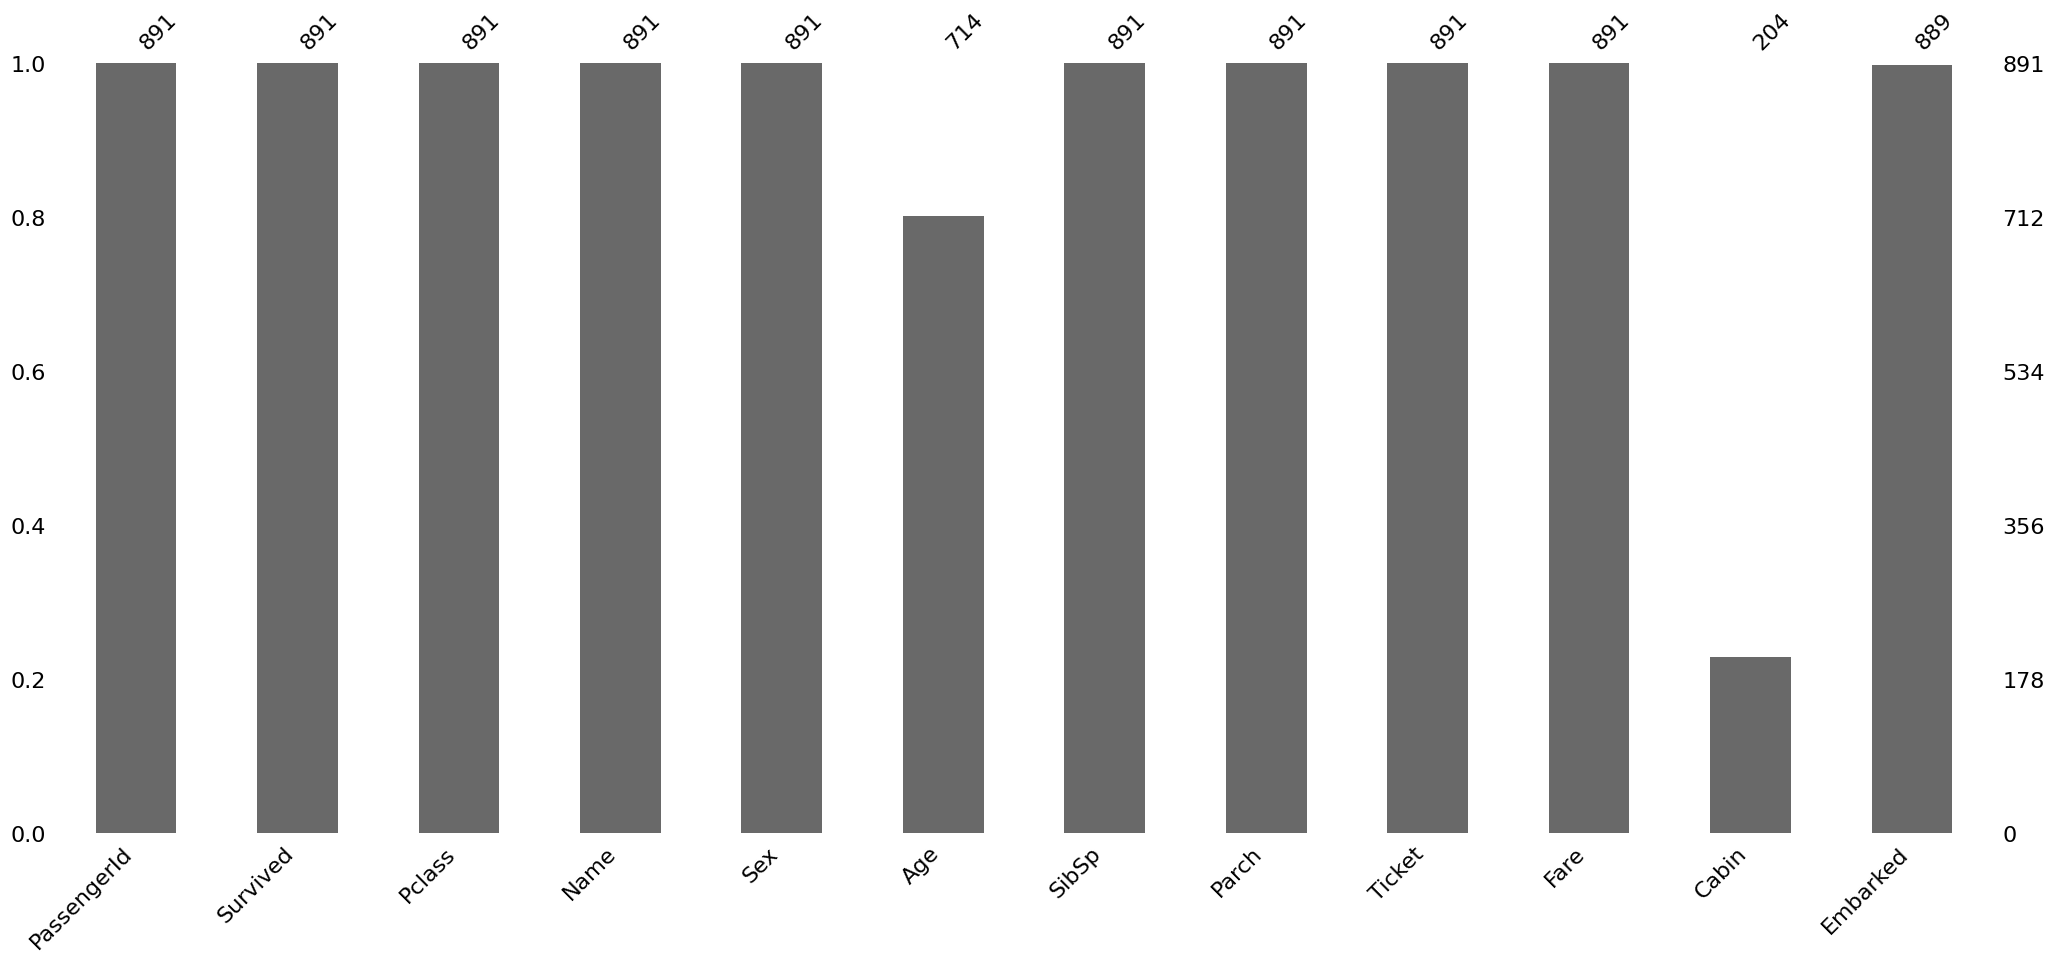

In [5]:
msng.bar(df) #graphical precentation of missing value

In [6]:
m=df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.duplicated().sum()

0

#Step 3: Seperate X and Y(Survived)

In [8]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [9]:

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [10]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [11]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

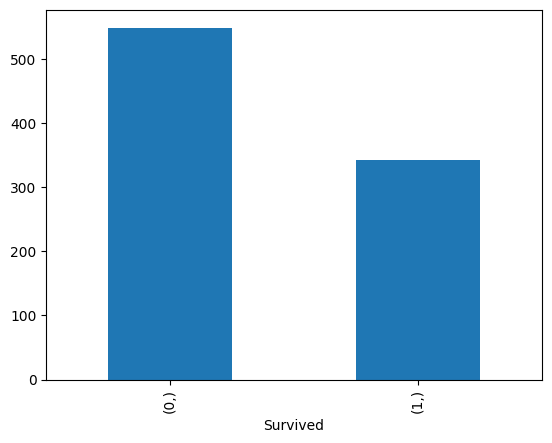

In [13]:
Y.value_counts().plot(kind='bar')

#Step 4: Perform Preprocessing on X

In [14]:
# Sep cat and con features
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [15]:
cat

['Sex', 'Embarked']

In [16]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [19]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [20]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [21]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


#Step 5: Perform train test split

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [23]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
793,-1.566107,-0.104637,-0.474545,-0.473674,-0.030371,0.0,1.0,1.0,0.0,0.0
23,-1.566107,-0.104637,-0.474545,-0.473674,0.066360,0.0,1.0,0.0,0.0,1.0
97,-1.566107,-0.488887,-0.474545,0.767630,0.627278,0.0,1.0,1.0,0.0,0.0
9,-0.369365,-1.180535,0.432793,-0.473674,-0.042956,1.0,0.0,1.0,0.0,0.0
157,0.827377,0.049062,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [24]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [25]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
617,0.827377,-0.258337,0.432793,-0.473674,-0.324253,1.0,0.0,0.0,0.0,1.0
379,0.827377,-0.796286,-0.474545,-0.473674,-0.491874,0.0,1.0,0.0,0.0,1.0
725,0.827377,-0.719436,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
826,0.827377,-0.104637,-0.474545,-0.473674,0.489104,0.0,1.0,0.0,0.0,1.0
450,-0.369365,0.510161,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0


In [27]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


In [28]:
xtrain.shape

(712, 10)

In [29]:
xtest.shape

(179, 10)

#Step 6: Perform Algorithm evaluation

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [31]:
dct = {'Logistic':LogisticRegression(),
       'Decision Tree': DecisionTreeClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier(),
       'KNN':KNeighborsClassifier(),
       'SVM':SVC()}

In [32]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

In [33]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [35]:
from warnings import filterwarnings
filterwarnings('ignore')

train = []
test = []
train_cv = []
for name, model in dct.items():
    # Fit the model on train data
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Calculate F1 score in train and test
    f1_train = f1_score(ytrain, ypred_train, average='macro')
    f1_test = f1_score(ytest, ypred_test, average='macro')
    # Calcualte F1 5 fold cross validated score
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append all above values in list
    train.append(f1_train)
    test.append(f1_test)
    train_cv.append(f1_cv)
    # Print the results
    print(f'Model Name : {name}\n')
    print(f'Train F1 : {f1_train:.4f}')
    print(f'Test F1 : {f1_test:.4f}')
    print(f'Train F1 CV 5 Fold : {f1_cv:.4f}')
    print('\n==================================================\n')

Model Name : Logistic

Train F1 : 0.7876
Test F1 : 0.7931
Train F1 CV 5 Fold : 0.7820


Model Name : Decision Tree

Train F1 : 0.9834
Test F1 : 0.7771
Train F1 CV 5 Fold : 0.7616


Model Name : Random Forest

Train F1 : 0.9835
Test F1 : 0.8231
Train F1 CV 5 Fold : 0.7793


Model Name : Gradient Boost

Train F1 : 0.8943
Test F1 : 0.8285
Train F1 CV 5 Fold : 0.7899


Model Name : KNN

Train F1 : 0.8403
Test F1 : 0.8060
Train F1 CV 5 Fold : 0.7677


Model Name : SVM

Train F1 : 0.8240
Test F1 : 0.8265
Train F1 CV 5 Fold : 0.8044




#Save above results in dataframe

In [36]:
results = {'name' : list(dct.keys()),
           'F1 Train': train,
           'F1 Test': test,
           'F1 Train CV': train_cv}

In [37]:
df_res = pd.DataFrame(results)
df_res

,name,F1 Train,F1 Test,F1 Train CV
0,Logistic,0.787602,0.793077,0.781993
1,Decision Tree,0.983432,0.777130,0.761649
2,Random Forest,0.983533,0.823123,0.779319
3,Gradient Boost,0.894330,0.828550,0.789945
4,KNN,0.840302,0.805952,0.767675
5,SVM,0.824030,0.826533,0.804357


In [38]:
df_res.sort_values(by='F1 Train CV', ascending=False)

,name,F1 Train,F1 Test,F1 Train CV
5,SVM,0.824030,0.826533,0.804357
3,Gradient Boost,0.894330,0.828550,0.789945
0,Logistic,0.787602,0.793077,0.781993
2,Random Forest,0.983533,0.823123,0.779319
4,KNN,0.840302,0.805952,0.767675
1,Decision Tree,0.983432,0.777130,0.761649


In [41]:
df_res.sort_values(by='F1 Train CV', ascending=False)

,name,F1 Train,F1 Test,F1 Train CV
5,SVM,0.824030,0.826533,0.804357
3,Gradient Boost,0.894330,0.828550,0.789945
0,Logistic,0.787602,0.793077,0.781993
2,Random Forest,0.983533,0.823123,0.779319
4,KNN,0.840302,0.805952,0.767675
1,Decision Tree,0.983432,0.777130,0.761649


#For this dataset SVM performs best with higest cross validation score of 0.8043

Build and evaluate SVM model

In [42]:
best_svm = SVC(probability=True)
best_svm.fit(xtrain, ytrain)

SVC(probability=True)

In [43]:
SVC(probability=True)

SVC(probability=True)

In [44]:
best_svm.score(xtrain, ytrain)

0.8412921348314607

In [45]:
best_svm.score(xtest, ytest)

0.8379888268156425

Plot the confusion matrix

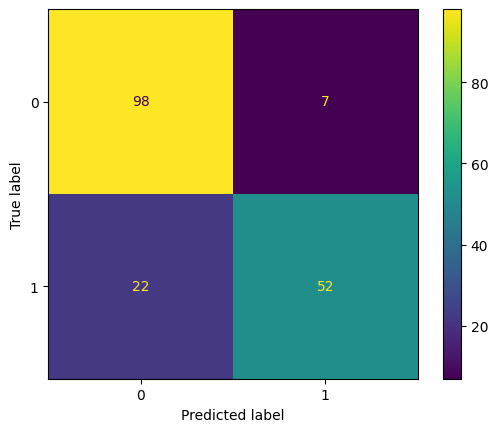

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_svm, xtest, ytest)

#Print the classification reports

In [47]:
ypred_train = best_svm.predict(xtrain)
ypred_test = best_svm.predict(xtest)

In [48]:
ypred_train[0:5]

array([0, 0, 0, 1, 0])

In [49]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [50]:
ypred_test[0:5]

array([0, 0, 0, 0, 0])

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       105
           1       0.88      0.70      0.78        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179



#Plot ROC AUC (Reciever Operator Characterestics, Area under curve)

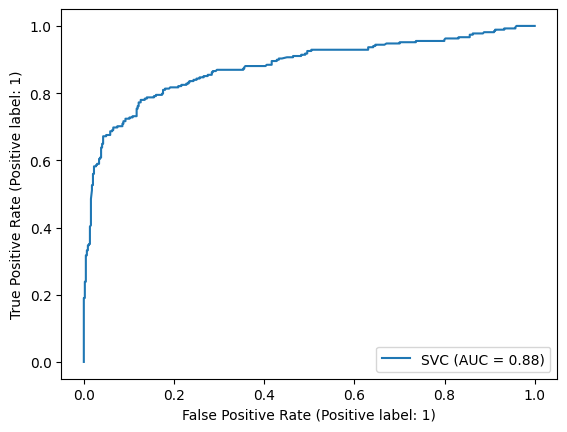

In [52]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_svm, xtrain, ytrain)

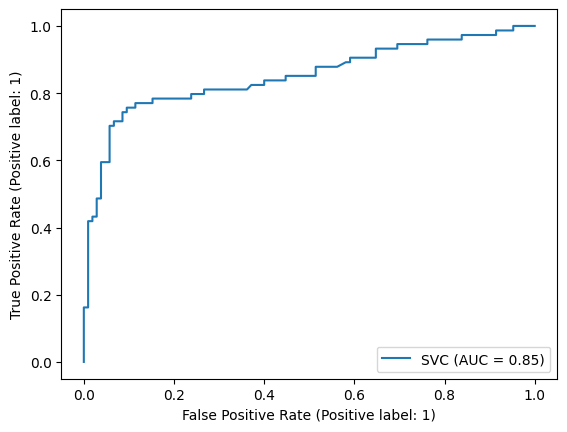

In [53]:
RocCurveDisplay.from_estimator(best_svm, xtest, ytest)

Perform Out of Sample Predictions

In [55]:
xnew = pd.read_csv('/content/test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [57]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


#Predict results along with probability

In [58]:
preds = best_svm.predict(xnew_pre)
probs = best_svm.predict_proba(xnew_pre)

In [59]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
best_svm.classes_

array([0, 1])

In [61]:
probs[0:5]

array([[0.84074756, 0.15925244],
       [0.58663045, 0.41336955],
       [0.86935925, 0.13064075],
       [0.8533992 , 0.1466008 ],
       [0.54143601, 0.45856399]])

In [62]:
prob_sur = probs[:, 1]
prob_sur[0:5]

array([0.15925244, 0.41336955, 0.13064075, 0.1466008 , 0.45856399])

In [63]:

df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [64]:
df_final['Survived_pred'] = preds
df_final['Probability'] = prob_sur

In [65]:
df_final

,PassengerId,Survived_pred,Probability
0,892,0,0.159252
1,893,0,0.413370
2,894,0,0.130641
3,895,0,0.146601
4,896,0,0.458564
...,...,...,...
413,1305,0,0.146460
414,1306,1,0.877563
415,1307,0,0.155821
416,1308,0,0.146460


In [66]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    275
1    143
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

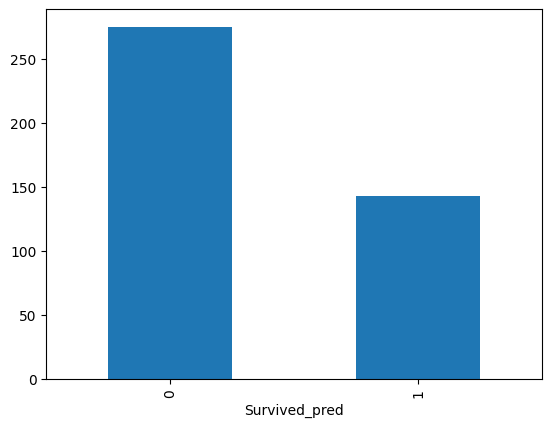

In [67]:
df_final['Survived_pred'].value_counts().plot(kind='bar')

In [68]:
# Save above dataframe to csv
df_final.to_csv('Results.csv', index=False)